In [12]:
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os.path

# Generate deformation mesh

## Generate   structured mesh from 

## Generate unstructured mesh

## Geometry and flow 2d data, NaNs in the flow fields indicate obstacles

The computational domain is $[-100, 100]\times[-10,10]$, mesh size is dx = 0.1, therefore, we have 2001, 201 points in the x direction and y direction, respectively.


* geometry information
  x_2d_data_periodic.npy: 201 by 2001 by n_data,       x coordinate
  y_2d_data_periodic.npy: 201 by 2001 by n_data,       y coordinate

* flow information
  u_2d_data_periodic.npy: 201 by 2001 by n_data,      u velocity (NaN outside physical domain)
  v_2d_data_periodic.npy: 201 by 2001 by n_data,      v velocity (NaN outside physical domain) 
  vor_2d_data_periodic.npy: 201 by 2001 by n_data,    vorticity (NaN outside physical domain)
  wdist_2d_data_periodic.npy: 201 by 2001 by n_data,  wall distance (negative outside physical  domain)
 
* information array 
  info_2d_data: 7 by n_data, including x2, x3, h, theta1(rad), theta2(rad), pressure, number of active nodes


## Bacteria 1d data

* distribution information at the 500 time step, this is not scaled to 1, it is like (smoothed) bin plot
    
    density_1d_raw_data.npy: 2001 by n_data, number of particles between [-100, 100]
    density_1d_data.npy: 2001 by n_data, number of particles between [-100, 100], this is smoothed with scipy.stats.gaussian_kde
    
    
    
## Geometry and flow 1d data, pad with NaN

* geometry information
  x_1d_data_periodic.npy: 8483 by n_data,    x coordinate (NaN padding)
  y_1d_data_periodic.npy: 8483 by n_data,    y coordinate (NaN padding)

* flow information
  u_1d_data_periodic.npy: 8483 by n_data,      u velocity        (NaN padding)
  v_1d_data_periodic.npy: 8483 by n_data,      v velocity        (NaN padding)
  vor_1d_data_periodic.npy: 8483 by n_data,    vorticity         (NaN padding)
  wdist_1d_data_periodic.npy: 8483 by n_data,   wall distance    (NaN padding)
 

Data are sorted as 

```
for x2 in range(41,60,2):
    for x3 in range(41,60,2):
        for h in np.arange(2,6.6,0.5):
```

In [13]:
pref_folder = "/groups/esm/dzhuang/Catheter/"

density_1d_data = np.load(pref_folder+"density_1d_data.npy")
density_1d_raw_data = np.load(pref_folder+"density_1d_raw_data.npy")


x_2d_data = np.load(pref_folder+"x_2d_data_periodic.npy")
y_2d_data = np.load(pref_folder+"y_2d_data_periodic.npy")
u_2d_data = np.load(pref_folder+"u_2d_data_periodic.npy")
wdist_2d_data = np.load(pref_folder+"wdist_2d_data_periodic.npy")
info_2d_data = np.load(pref_folder+"info_2d_data.npy")


x_1d_data = np.load(pref_folder+"x_1d_data_periodic.npy")
y_1d_data = np.load(pref_folder+"y_1d_data_periodic.npy")
u_1d_data = np.load(pref_folder+"u_1d_data_periodic.npy")
wdist_1d_data = np.load(pref_folder+"wdist_1d_data_periodic.npy")
info_1d_data = np.load(pref_folder+"info_1d_data.npy")

# visualize 2d flow field

41.0 45.0 2.5


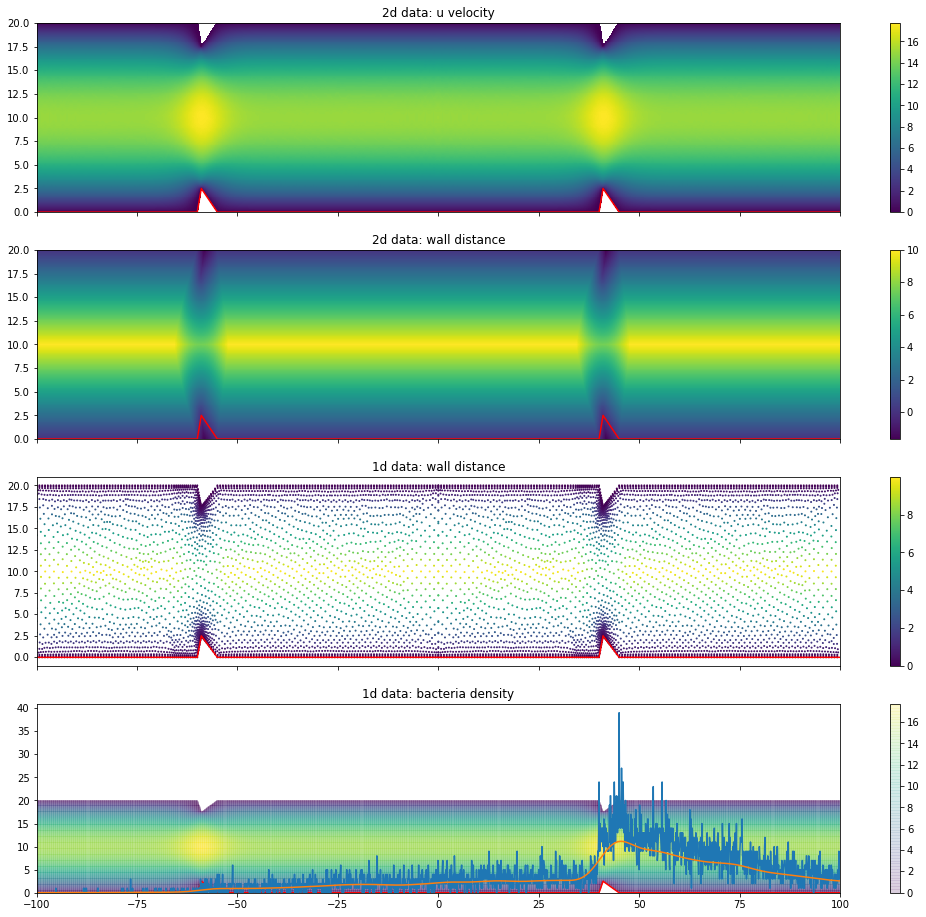

In [16]:
sample_id = 21
fig, ax = plt.subplots(nrows=4,sharex=True, sharey=False, figsize=(18,16))

x2, x3, h, theta1, theta2, p, n_active_2d = info_2d_data[:, sample_id]
x2, x3, h, theta1, theta2, p, n_active_1d = info_1d_data[:, sample_id]

print(x2, x3, h)

n_active_1d = np.int64(n_active_1d)
x_2d = x_2d_data[:,:,sample_id]
y_2d = y_2d_data[:,:,sample_id]
u_2d = u_2d_data[:,:,sample_id]
wdist_2d = wdist_2d_data[:,:,sample_id]
t = 100     
density = density_1d_data[:, sample_id]
density_raw = density_1d_raw_data[:, sample_id]

bottom_x, bottom_y = np.array([0-100, 40.0-100, x2-100, x3-100, 0, 40.0, x2, x3, 100.0]),  np.array([0, 0.0, h, 0, 0.0, 0, h, 0, 0.0])

# visualize 2d flow u velocity
im0 = ax[0].pcolormesh(x_2d, y_2d, u_2d)
ax[0].plot(bottom_x, bottom_y, color="r")
ax[0].set_title("2d data: u velocity")
fig.colorbar(im0,ax=ax[0])


# visualize 2d flow wall distance
im1 = ax[1].pcolormesh(x_2d, y_2d, wdist_2d)
ax[1].plot(bottom_x, bottom_y, color="r")
ax[1].set_title("2d data: wall distance")
fig.colorbar(im1,ax=ax[1])

# visualize 1d flow u velocity
x_1d = x_1d_data[:,sample_id][0:n_active_1d]
y_1d = y_1d_data[:,sample_id][0:n_active_1d]
u_1d = u_1d_data[:,sample_id][0:n_active_1d]
wdist_1d = wdist_1d_data[:,sample_id][0:n_active_1d]
im2 = ax[2].scatter(x_1d, y_1d, s=1, c=wdist_1d)
ax[2].plot(bottom_x, bottom_y, color="r")
ax[2].set_title("1d data: wall distance")
fig.colorbar(im2,ax=ax[2])


# visualize bacteria density
im3 = ax[3].pcolormesh(x_2d, y_2d, u_2d, alpha=0.1)
ax[3].plot(bottom_x, bottom_y, color="r")   
xx = np.linspace(-100, 100, 2001)
ax[3].plot(xx, density_raw)
ax[3].plot(xx, density)

ax[3].set_title("1d data: bacteria density")
fig.colorbar(im3,ax=ax[3])

fig.savefig("Data_vis.png")
